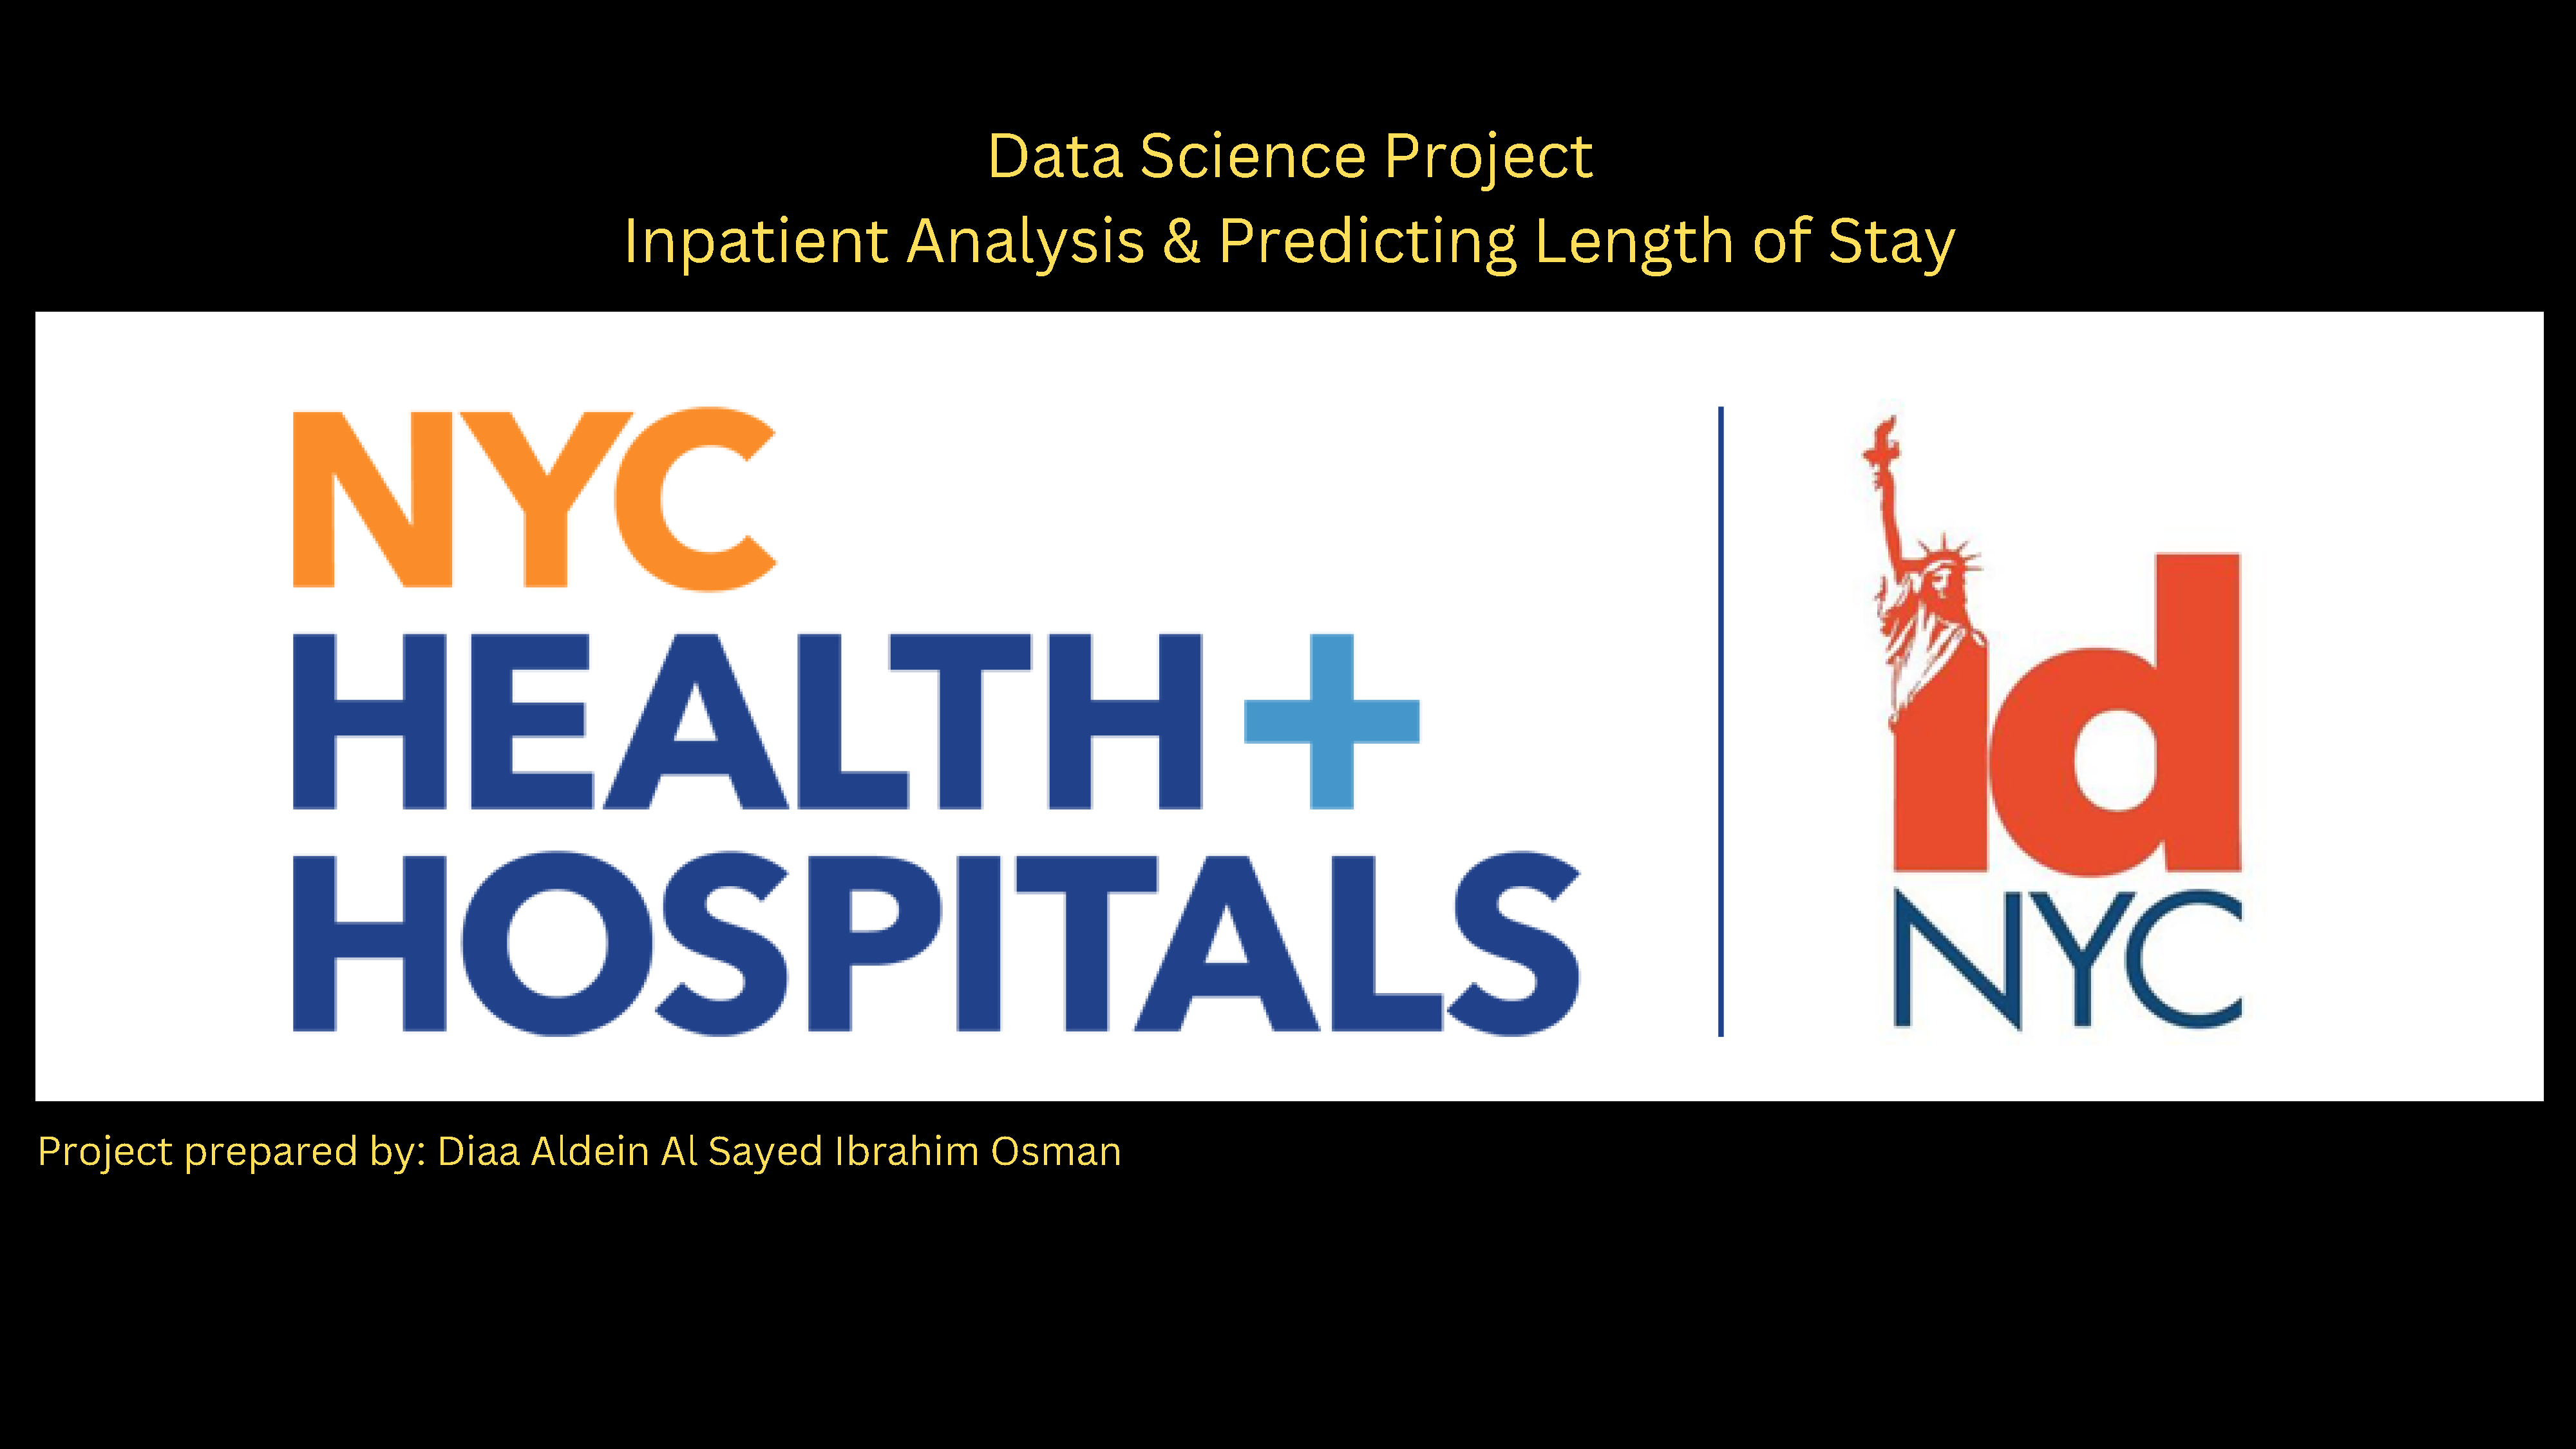

# Hospital Inpatient Discharges (SPARCS De-Identified): 2015

Data obtained from https://www.kaggle.com/datasets/jonasalmeida/2015-deidentified-ny-inpatient-discharge-sparcs/data

## About Dataset
Public Health Data
This is the public dataset made available at https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/82xm-y6g8 by the Dept of Health of New York state. The following description can be found at that page:

* The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges. This data file contains basic record level detail for the discharge. The de-identified data file does not contain data that is protected health information (PHI) under HIPAA. The health information is not individually identifiable; all data elements considered identifiable have been redacted. For example, the direct identifiers regarding a date have the day and month portion of the date removed.
---
* The aim of this project is to conduct inpatient analysis and predict the length of stay in the hospital using the parameters likely to be available when the patient is admitted.
---
* The data is unclean, has missing values, and contains 2.35 million rows and 37 columns. It may not be necessary to include all instances and features to achieve the goal of this project.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings            
warnings.filterwarnings("ignore") 

In [2]:
# loading the dataset.
df = pd.read_csv('../data/raw/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv',low_memory=False)

In [3]:
# veiwing the head of the data the first 5 rows
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$5620.00,$4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,NaN,NaN,275408.0,NaN,NaN,0,N,Y,$7404.18,$6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$7931.28,$7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,271326.0,NaN,NaN,0,N,Y,$11304.44,$4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,NaN,NaN,243034.0,NaN,NaN,0,N,Y,$8330.50,$4361.74


In [4]:
# Geitting Information about the Data
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346760 entries, 0 to 2346759
Data columns (total 37 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Health Service Area                  2343849 non-null  object 
 1   Hospital County                      2343849 non-null  object 
 2   Operating Certificate Number         2343849 non-null  float64
 3   Facility Id                          2343849 non-null  float64
 4   Facility Name                        2346760 non-null  object 
 5   Age Group                            2346760 non-null  object 
 6   Zip Code - 3 digits                  2342333 non-null  object 
 7   Gender                               2346760 non-null  object 
 8   Race                                 2346760 non-null  object 
 9   Ethnicity                            2346760 non-null  object 
 10  Length of Stay                       2346760 non-null  object 
 11

In [5]:
# Modifing columns name
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_").str.replace("-","")
df.columns

Index(['health_service_area', 'hospital_county',
       'operating_certificate_number', 'facility_id', 'facility_name',
       'age_group', 'zip_code__3_digits', 'gender', 'race', 'ethnicity',
       'length_of_stay', 'type_of_admission', 'patient_disposition',
       'discharge_year', 'ccs_diagnosis_code', 'ccs_diagnosis_description',
       'ccs_procedure_code', 'ccs_procedure_description', 'apr_drg_code',
       'apr_drg_description', 'apr_mdc_code', 'apr_mdc_description',
       'apr_severity_of_illness_code', 'apr_severity_of_illness_description',
       'apr_risk_of_mortality', 'apr_medical_surgical_description',
       'payment_typology_1', 'payment_typology_2', 'payment_typology_3',
       'attending_provider_license_number',
       'operating_provider_license_number', 'other_provider_license_number',
       'birth_weight', 'abortion_edit_indicator',
       'emergency_department_indicator', 'total_charges', 'total_costs'],
      dtype='object')

In [6]:
#checking for missing data percentage
df.isnull().mean()*100

health_service_area                     0.124043
hospital_county                         0.124043
operating_certificate_number            0.124043
facility_id                             0.124043
facility_name                           0.000000
age_group                               0.000000
zip_code__3_digits                      0.188643
gender                                  0.000000
race                                    0.000000
ethnicity                               0.000000
length_of_stay                          0.000000
type_of_admission                       0.000000
patient_disposition                     0.000000
discharge_year                          0.000000
ccs_diagnosis_code                      0.000000
ccs_diagnosis_description               0.000000
ccs_procedure_code                      0.000000
ccs_procedure_description               0.000000
apr_drg_code                            0.000000
apr_drg_description                     0.000000
apr_mdc_code        

* As the data contains 2.35 million rows and 37 columns then For any columns that have more than 20% missing values we are going to drop it. Affected columns as follows:  
1. payment_typology_2 by                     32.490264 %
2. payment_typology_3 by                    70.124635 %
3. operating_provider_license_number by     26.114227 %
4. other_provider_license_number by         96.957239 %
---
* For less than 20 % we are going to drop rows. affected columns as follows:
1. health_service_area by                     0.124166 %
2. hospital_county  by                        0.124166 %
3. operating_certificate_number by            0.124166 %
4. facility_id by                             0.124166 %
5. zip_code__3_digits by                      0.188744 %
6. apr_severity_of_illness_description by     0.004777 %
7. apr_risk_of_mortality by                   0.004777 %
8. attending_provider_license_number by       0.124166 %

In [7]:
df.drop(['payment_typology_2','payment_typology_3','operating_provider_license_number','other_provider_license_number'],axis=1,inplace=True)

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
#checking for missing data percentage
df.isnull().mean()*100

health_service_area                    0.0
hospital_county                        0.0
operating_certificate_number           0.0
facility_id                            0.0
facility_name                          0.0
age_group                              0.0
zip_code__3_digits                     0.0
gender                                 0.0
race                                   0.0
ethnicity                              0.0
length_of_stay                         0.0
type_of_admission                      0.0
patient_disposition                    0.0
discharge_year                         0.0
ccs_diagnosis_code                     0.0
ccs_diagnosis_description              0.0
ccs_procedure_code                     0.0
ccs_procedure_description              0.0
apr_drg_code                           0.0
apr_drg_description                    0.0
apr_mdc_code                           0.0
apr_mdc_description                    0.0
apr_severity_of_illness_code           0.0
apr_severit

In [10]:
#checking for duplication in data 
df.duplicated().sum()

3201

In [11]:
# Deal with duplicates by droping them
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [14]:
pd.set_option('display.max_columns', None)  # This will display all columns

In [15]:
df.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,discharge_year,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,attending_provider_license_number,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,2015,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,267162.0,0,N,Y,$5620.00,$4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,8,Emergency,Home or Self Care,2015,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,275408.0,0,N,Y,$7404.18,$6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,8,Emergency,Home or Self Care,2015,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,267162.0,0,N,Y,$7931.28,$7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2015,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,271326.0,0,N,Y,$11304.44,$4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,2015,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicaid,243034.0,0,N,Y,$8330.50,$4361.74


In [16]:
# checking features unique values.
for i in list(df.columns):
    print(i)
    print(df[i].unique())
    print("*"*100)

health_service_area
['Western NY' 'Finger Lakes' 'Central NY' 'Southern Tier' 'Capital/Adiron'
 'Hudson Valley' 'New York City' 'Long Island']
****************************************************************************************************
hospital_county
['Cattaraugus' 'Chautauqua' 'Erie' 'Genesee' 'Niagara' 'Chemung'
 'Livingston' 'Monroe' 'Ontario' 'Steuben' 'Wayne' 'Yates' 'Oswego'
 'Broome' 'Cayuga' 'Chenango' 'Cortland' 'Herkimer' 'Jefferson' 'Lewis'
 'Madison' 'Oneida' 'Onondaga' 'St Lawrence' 'Tompkins' 'Albany' 'Clinton'
 'Columbia' 'Franklin' 'Fulton' 'Montgomery' 'Otsego' 'Rensselaer'
 'Saratoga' 'Schenectady' 'Warren' 'Dutchess' 'Orange' 'Putnam' 'Rockland'
 'Sullivan' 'Ulster' 'Westchester' 'Bronx' 'Kings' 'Manhattan' 'Richmond'
 'Queens' 'Suffolk' 'Nassau' 'Allegany' 'Wyoming' 'Orleans' 'Schuyler'
 'Delaware' 'Essex' 'Schoharie']
****************************************************************************************************
operating_certificate_number
[ 401001. 

['147' '141' '142' '143' '140' 'OOS' '148' '146' '145' '144' '149' '130'
 '131' '139' '137' '138' '136' '117' '133' '134' '132' '135' '123' '128'
 '122' '121' '120' '124' '104' '125' '129' '116' '110' '126' '109' '127'
 '105' '106' '108' '100' '112' '107' '114' '113' '111' '103' '115' '119'
 '101' '118']
****************************************************************************************************
gender
['F' 'M' 'U']
****************************************************************************************************
race
['White' 'Other Race' 'Black/African American' 'Multi-racial']
****************************************************************************************************
ethnicity
['Not Span/Hispanic' 'Unknown' 'Spanish/Hispanic' 'Multi-ethnic']
****************************************************************************************************
length_of_stay
['5' '8' '4' '3' '2' '9' '1' '59' '10' '17' '35' '15' '12' '7' '98' '26'
 '6' '46' '32' '16' '21' '22' '13' '7

['NO PROC' 'RESP INTUB/MECH VENTIL' 'OT DX PRC (INTERVW,EVAL'
 'TRACTN, SPLNT, OT WOUND' 'OTHER THERAPEUTIC PRCS'
 'OT PRCS TO ASSIST DELIV' 'CESAREAN SECTION' 'ELECTROGR CARDIAC MONIT'
 'BIOPSY OF LIVER' 'BLOOD TRANSFUSION' 'REPAIR CUR OBS LACERATN'
 'PSYCHO/PSYCHI EVAL/THER' 'SUTURE SKIN/SUBCUT TISS' 'FETAL MONITORING'
 'COLONOSCOPY AND BIOPSY' 'OT NON-OR THER PRC NOSE'
 'DEBRIDE WOUND,INF,BURN' 'UP GASTRO ENDOSC/BIOPSY' 'CT SCAN CHEST'
 'HEMORRHOID PRCS' 'DX ULTRASOUND HEART' 'EPISIOTOMY'
 'OT NON-OR THER PRC; FEM' 'PERIPH VASCULAR BYPASS'
 'DIAGNOSTIC SPINAL TAP' 'OTHER RESP THERAPY' 'SKIN GRAFT' 'APPENDECTOMY'
 'CT SCAN ABDOMEN' 'MAG RESONANCE IMAGING' 'OTHER BOWEL DX PRCS'
 'ART RUPT MEMB ASSIS DLV' 'LAMINECTOMY; EXC IV DSC'
 'FORCEP;VAC;BREACH DELIV' 'ELECTROENCEPHALOGRAM'
 'OT NON-OR LW GI THER PR' 'OT FRACTURE/DISLOC PRC'
 'DX CARDIAC CATHETERIZTN' 'ALCO/DRUG REHAB/DETOX'
 'PROPHYLACTIC VAC/INOCUL' 'OT OR PRCS VES NOT HEAD'
 'COLORECTAL RESECTION' 'OT THER PRCS ON MUSCLES'
 'R

['Mental Diseases and Disorders'
 'Diseases and Disorders of the Respiratory System'
 'Diseases and Disorders of the Nervous System'
 'Diseases and Disorders of the Circulatory System'
 'Diseases and Disorders of the Kidney and Urinary Tract'
 'Diseases and Disorders of the Digestive System'
 'Endocrine, Nutritional and Metabolic Diseases and Disorders'
 'Pregnancy, Childbirth and the Puerperium' 'Burns'
 'Infectious and Parasitic Diseases, Systemic or Unspecified Sites'
 'Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast'
 'Human Immunodeficiency Virus Infections'
 'Diseases and Disorders of the Hepatobiliary System and Pancreas'
 'Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders'
 'Multiple Significant Trauma'
 'Newborns and Other Neonates with Conditions Originating in the Perinatal Period'
 'Lymphatic, Hematopoietic, Other Malignancies, Chemotherapy and Radiotherapy'
 'Diseases and Disorders of the Eye'
 'Diseases and Disorders of the Female Repro

In [17]:
# checking features value counts.
for i in list(df.columns):
    print(i)
    print(df[i].value_counts())
    print("*"*100)

health_service_area
New York City     1088280
Long Island        339082
Hudson Valley      245672
Capital/Adiron     167249
Western NY         163810
Central NY         158256
Finger Lakes       146504
Southern Tier       30167
Name: health_service_area, dtype: int64
****************************************************************************************************
hospital_county
Manhattan      399082
Kings          248205
Queens         196636
Bronx          187481
Nassau         181092
Suffolk        157990
Erie           120486
Westchester    119252
Monroe         105107
Onondaga        78347
Albany          65711
Richmond        56876
Orange          39499
Dutchess        32582
Rockland        31834
Oneida          29898
Broome          28524
Schenectady     22267
Niagara         17152
Warren          14088
Chemung         13841
Otsego          12265
Rensselaer      11953
Ontario         11949
Ulster          11359
St Lawrence     11104
Jefferson       10821
Chautauqua      10476

Neonate birthwt >2499g, normal newborn or neonate w other problem    195131
Vaginal delivery                                                     146559
Septicemia & disseminated infections                                  94925
Cesarean delivery                                                     75925
Heart failure                                                         56346
                                                                      ...  
Abortion w/o D&C, aspiration curettage or hysterotomy                    91
Neonate w ECMO                                                           53
Extensive 3rd degree burns w skin graft                                  43
Neonate, transferred <5 days old, not born here                          35
Pancreas transplant                                                      34
Name: apr_drg_description, Length: 314, dtype: int64
****************************************************************************************************
apr_mdc_co

From the above info, unique, and value counts we found that:
1. zip_code__3_digits feature have strange value 'OOS' repeated 67135 times which refer to Out of State zip codes we can replace it with 005 to indicate out of state. Also, changing dtype to numeric.
2. gender feature have strange value 'U' repeated 39 times we are going to drop it.
3. length_of_stay feature have '120 +' value need to be modified by remove + sine. also dtype need to be change to numerical.
4. discharge_year feature have only 2015 value. it will not be useful we are going to drop it.
5. attending_provider_license_number feature it is not useful and we are going to drop it.
6. abortion_edit_indicator feature have only 'N' value. it will not be useful we are going to drop it.
7. total_charges feature have Dollar signe. need to be removed and replace dtype.
8. total_costs feature have Dollar signe. need to be removed and replace dtype.

In [18]:
# starting with zip_code__3_digits feature replacing 'OOS' values to '005' and fixing dtype.
df['zip_code__3_digits'] = df['zip_code__3_digits'].apply(lambda x: str(x).replace('OOS','005'))
df['zip_code__3_digits'] = pd.to_numeric(df['zip_code__3_digits'])
df['zip_code__3_digits'].value_counts()

112    312556
104    224283
117    181935
100    169994
113    121114
114     91116
115     88621
5       67135
142     66099
103     62222
105     61757
109     59030
146     56173
125     46275
140     43785
130     40050
120     34905
119     34057
145     31450
107     30914
121     30471
132     29311
144     29232
110     26775
136     26067
148     25022
128     24434
134     21468
141     21110
124     20466
111     20017
131     18515
116     18424
123     18414
122     17865
147     17268
133     16186
129     15132
137     14449
138     13705
127     12121
126     10862
135     10666
143     10158
108      9387
139      9103
106      9002
118      7930
149      6486
101      5503
Name: zip_code__3_digits, dtype: int64

In [19]:
# droping 'U' values from gender feature
df = df.loc[df.gender != 'U']

In [20]:
df.gender.value_counts()

F    1301751
M    1037230
Name: gender, dtype: int64

In [21]:
# finding out how many values in the data have '120 +' values
df[df['length_of_stay']== '120 +']['length_of_stay'].count()

1857

In [22]:
# length_of_stay feature have '120 +' value be modified by remove + sine. also dtype need to be change to numerical.
df['length_of_stay'] = df['length_of_stay'].replace('120 +','120')

In [23]:
df['length_of_stay'].unique()

array(['5', '8', '4', '3', '2', '9', '1', '59', '10', '17', '35', '15',
       '12', '7', '98', '26', '6', '46', '32', '16', '21', '22', '13',
       '77', '14', '58', '28', '11', '18', '19', '29', '27', '42', '24',
       '23', '31', '37', '57', '25', '20', '30', '63', '43', '49', '45',
       '102', '56', '33', '40', '34', '55', '100', '47', '38', '61', '53',
       '117', '62', '120', '80', '48', '70', '44', '51', '41', '64', '50',
       '36', '107', '68', '74', '39', '87', '83', '54', '105', '81',
       '112', '76', '91', '86', '66', '72', '94', '93', '67', '69', '73',
       '119', '115', '75', '97', '92', '95', '60', '65', '82', '79', '71',
       '84', '109', '103', '118', '52', '101', '85', '110', '106', '88',
       '111', '104', '89', '78', '116', '90', '113', '108', '114', '96',
       '99'], dtype=object)

In [24]:
# changing data type to numerical
df['length_of_stay']=pd.to_numeric(df['length_of_stay'])

In [25]:
# droping unecessery features ['discharge_year','attending_provider_license_number','abortion_edit_indicator']
df.drop(['discharge_year','attending_provider_license_number','abortion_edit_indicator'],axis=1,inplace=True)

In [26]:
# replacing Dollar signs in total_charges & total_costs features and changing there dtype from object to numerical
df['total_costs'] = df['total_costs'].str.replace('$','')
df['total_charges'] = df['total_charges'].str.replace('$','')

# changing data type from object to numerical
df['total_costs'] = pd.to_numeric(df['total_costs'])
df['total_charges'] = pd.to_numeric(df['total_charges'])


In [27]:
df['total_costs']

0          4561.28
1          6933.94
2          7154.85
3          4584.11
4          4361.74
            ...   
2346755    6637.09
2346756    3236.18
2346757    1862.39
2346758    2744.13
2346759    2128.89
Name: total_costs, Length: 2338981, dtype: float64

In [30]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338981 entries, 0 to 2346759
Data columns (total 30 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   health_service_area                  2338981 non-null  object 
 1   hospital_county                      2338981 non-null  object 
 2   operating_certificate_number         2338981 non-null  float64
 3   facility_id                          2338981 non-null  float64
 4   facility_name                        2338981 non-null  object 
 5   age_group                            2338981 non-null  object 
 6   zip_code__3_digits                   2338981 non-null  int64  
 7   gender                               2338981 non-null  object 
 8   race                                 2338981 non-null  object 
 9   ethnicity                            2338981 non-null  object 
 10  length_of_stay                       2338981 non-null  int64  
 11

In [31]:
# saving file after cleaning process.
df.to_csv('../data/processed/cleaned_data.csv',index=False)

Data Cleaning & prepration Summery:
* Modifying columns names to be more suitable.
---
* As the data contains 2.35 million rows and 37 columns then For any columns that have more than 20% missing values we drop the columns. Affected columns as follows:  
1. payment_typology_2 by                     32.490264 %
2. payment_typology_3 by                    70.124635 %
3. operating_provider_license_number by     26.114227 %
4. other_provider_license_number by         96.957239 %
.
* For less than 20 % we drop rows. affected columns as follows:
1. health_service_area by                     0.124166 %
2. hospital_county  by                        0.124166 %
3. operating_certificate_number by            0.124166 %
4. facility_id by                             0.124166 %
5. zip_code__3_digits by                      0.188744 %
6. apr_severity_of_illness_description by     0.004777 %
7. apr_risk_of_mortality by                   0.004777 %
8. attending_provider_license_number by       0.124166 %
---
* After checking info, unique, and value counts we found that:

1. zip_code__3_digits feature has strange value 'OOS' repeated 67135 times which refer to Out of State zip codes replaced it with 005 to indicate out of state. Also, changing dtype to numeric.
2. gender feature have strange value 'U' repeated 39 times these values raws dropped.
3. length_of_stay feature has '120 +' value repeated 1857 time out of above 3 million record I treated all entires '120 +' as 120. also dtype changed to numerical.
4. discharge_year feature has only 2015 value. it will not be useful so drop it.
5. attending_provider_license_number feature it is not useful and we drop it.
6. abortion_edit_indicator feature have only 'N' value. it will not be useful we drop it.
7. total_charges feature have Dollar signe. Sign removed and replaced dtype to numerical.
8. total_costs feature have Dollar signe. Sign removed and replaced dtype to numerical.
---
* Saving file as cleaned_data.csv after cleaning process for next Analysis steps.